# Plotting variationally enhanced sampling (VES) data for alanine dipeptide
Here we plot the FES obtained via variationally enhanced sampling (VES) for alanine dipeptide in TIP3P water.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
dt = 0.002 # Timestep in fs. 
stride = 500. # Stride of VES optimization (in iterations)
times = np.array([100, 500, 1000, 2500, 5000, 10000, 20000, 40000]) # Times at which to plot FES (ps).

Loop through data, and generate contour plots at different time intervals

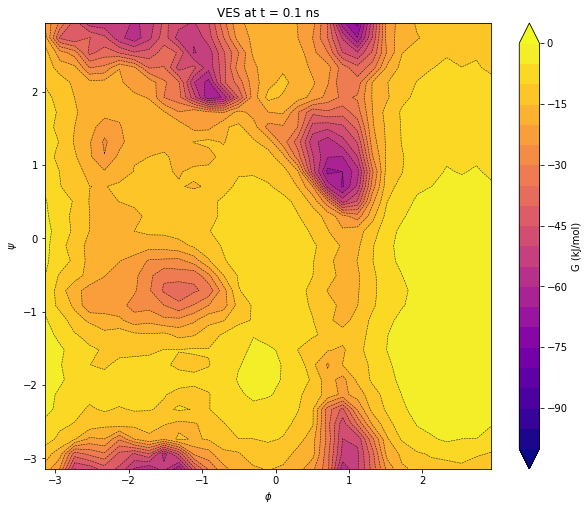

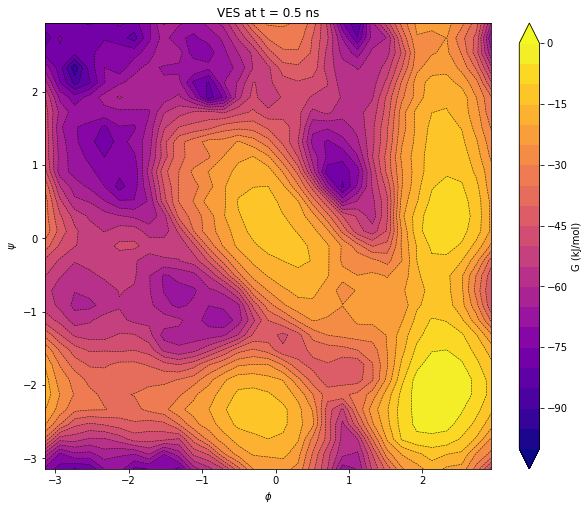

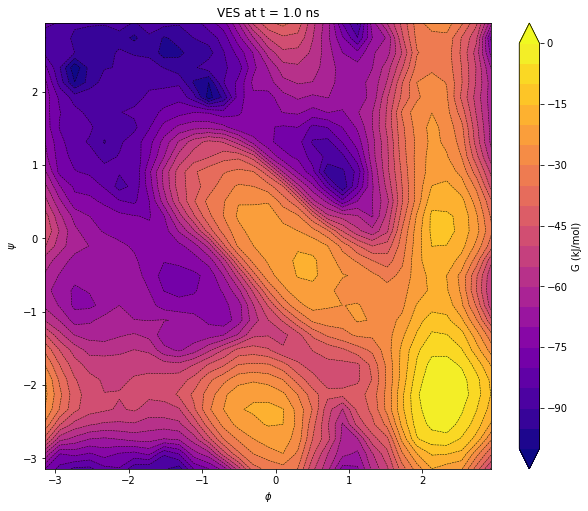

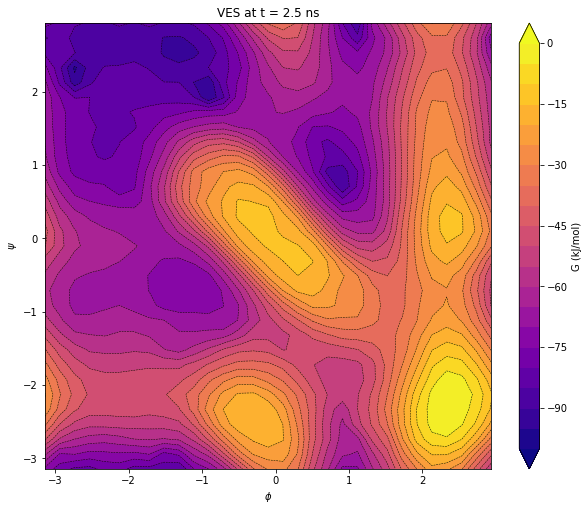

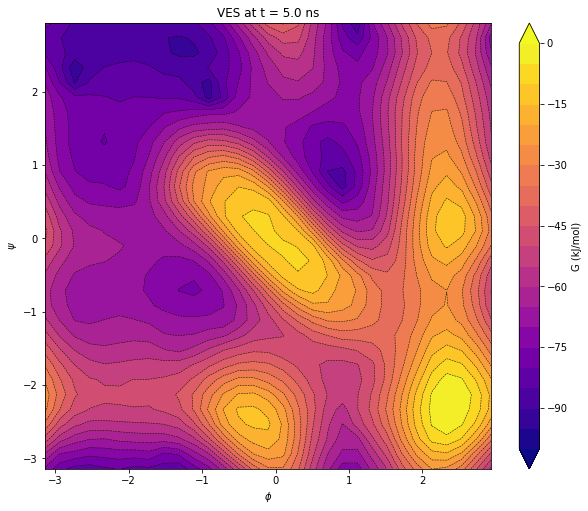

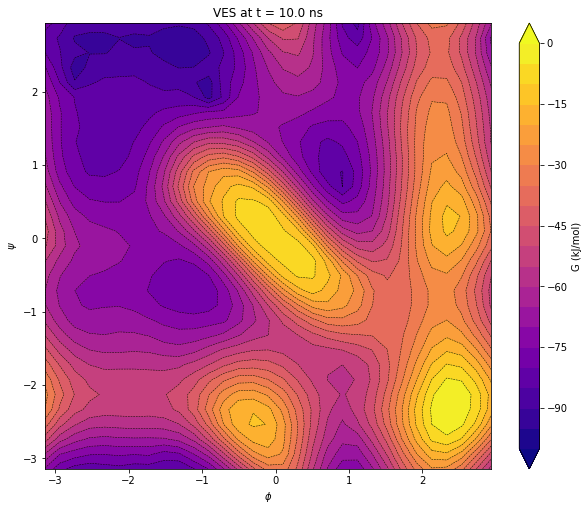

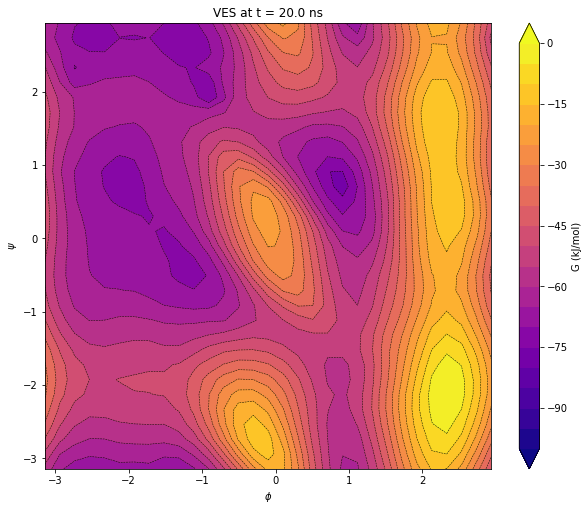

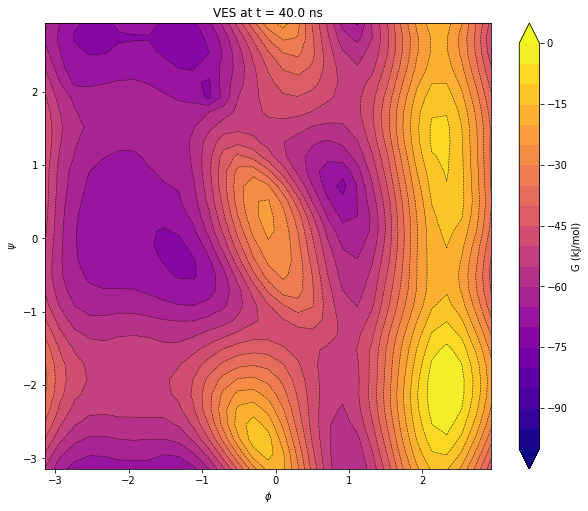

In [16]:
v = np.arange(-100, 5, 5) # Contours to plot.
for t in times:
    fig = plt.figure(figsize=(10, 8.2))
    frame = int(t/(stride*dt)) # We have a stride of 500.
    X = np.loadtxt("data/fes.b1.iter-{0:d}.data".format(frame), skiprows=9)

    # Reshape to grid.
    xg = X[:,0].reshape((31, 31))
    yg = X[:,1].reshape((31, 31))
    zg = X[:,2].reshape((31, 31))
    zg = zg - np.max(zg)
    
    plt.title("VES at t = {} ns".format(t/1000.))
    plt.contour(xg, yg, zg, v, linewidths=0.5, colors="k")
    plt.contourf(xg, yg, zg, v, cmap=plt.cm.plasma, extend="both")
    cb = plt.colorbar()
    cb.set_label("G (kJ/mol)")
    plt.xlabel("$\phi$")
    plt.ylabel("$\psi$")
    plt.xlim((-np.pi, np.pi))
    plt.ylim((-np.pi, np.pi))
    plt.axis("equal")
    
    plt.savefig("ves_{:.1f}ns.png".format(t/1000.))